<a href="https://colab.research.google.com/github/vindhya1103/GenAI/blob/main/GAI_Exp1_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AIM: Build an Artificial Neural Network to implement Binary Classification task using the Back-propagation algorithm and test the same using appropriate data sets.**

# **Description**

The data used here is : '**Pima Indians Diabetes Dataset**'. It is downloaded from : https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv

It is a binary (2-class) classification problem. There are 768 observations with 8 input variables and 1 output variable.

The variable names are as follows:

**1. Number of times pregnant.**

**2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.**

**3. Diastolic blood pressure (mm Hg).**

**4. Triceps skinfold thickness (mm).**

**5. 2-Hour serum insulin (mu U/ml).**

**6. Body mass index (weight in kg/(height in m)^2).**

**7. Diabetes pedigree function.**

**8. Age (years).**

**9. Class variable (0 or 1).**


 # **Data Import and Processing**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

In [ ]:
# load data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
data_pd = pd.read_csv(url,header = None)
print(data_pd.info())
print(data_pd.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   0    1   2   3    4     5      6   7  8
0  6  148  72  35    0  33.6  0.627  50  1
1  1   85  66  29    0  26.6  0.351  31  0
2  8  183  64   0    0  23.3  0.672  32  1
3  1   89  66  23   94  28.1  0.167  21  0
4  0  137  40  35  168  43.1  2.288  33  1


StandardScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
#Scaling Numerical columns
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
scaled = std.fit_transform(data_pd.iloc[:,0:8])
scaled = pd.DataFrame(scaled)
scaled.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [ ]:
X_data =scaled.to_numpy()
print('X_data:',np.shape(X_data))
Y_data = data_pd.iloc[:,8]
print('Y_data:',np.shape(Y_data))

X_data: (768, 8)
Y_data: (768,)


In [ ]:
# Split data into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.25, random_state= 0)

In [ ]:
# Check the dimension of the sets
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (576, 8)
y_train: (576,)
X_test: (192, 8)
y_test: (192,)


# **Design the Model**

In [ ]:
import keras
from keras.models import Sequential   # importing Sequential model
from keras.layers import Dense        # importing Dense layers

In [ ]:
# declaring model
basic_model = Sequential()

Check Eg: https://github.com/urjeet/Pima-Diabetes-Keras-Model/blob/master/pima_diabetes_keras_model.py

In [ ]:
# Adding layers to the model (DIY)
# First layers: 8 neurons/perceptrons that takes the input and uses 'sigmoid' activation function.
basic_model.add(Dense(8, input_dim=8, activation='sigmoid'))
# Second layers: 4 neurons/perceptrons, 'sigmoid' activation function.
basic_model.add(Dense(4, activation='sigmoid'))
# Final layer: 1 neuron/perceptron to do binary classification
basic_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compiling the model (DIY)
basic_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# **Train the Model**

In [ ]:
# training the model
epochs=120
history = basic_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs)

Epoch 1/120
18/18 [==============================] - 2s 46ms/step - loss: 0.6790 - accuracy: 0.6424 - val_loss: 0.6697 - val_accuracy: 0.6771
Epoch 2/120
18/18 [==============================] - 0s 4ms/step - loss: 0.6713 - accuracy: 0.6424 - val_loss: 0.6610 - val_accuracy: 0.6771
Epoch 3/120
18/18 [==============================] - 0s 4ms/step - loss: 0.6650 - accuracy: 0.6424 - val_loss: 0.6538 - val_accuracy: 0.6771
Epoch 4/120
18/18 [==============================] - 0s 4ms/step - loss: 0.6598 - accuracy: 0.6424 - val_loss: 0.6476 - val_accuracy: 0.6771
Epoch 5/120
18/18 [==============================] - 0s 5ms/step - loss: 0.6557 - accuracy: 0.6424 - val_loss: 0.6418 - val_accuracy: 0.6771
Epoch 6/120
18/18 [==============================] - 0s 6ms/step - loss: 0.6519 - accuracy: 0.6424 - val_loss: 0.6371 - val_accuracy: 0.6771
Epoch 7/120
18/18 [==============================] - 0s 19ms/step - loss: 0.6487 - accuracy: 0.6424 - val_loss: 0.6338 - val_accuracy: 0.6771
Epoch 8/120

#**Evaluate the Model**

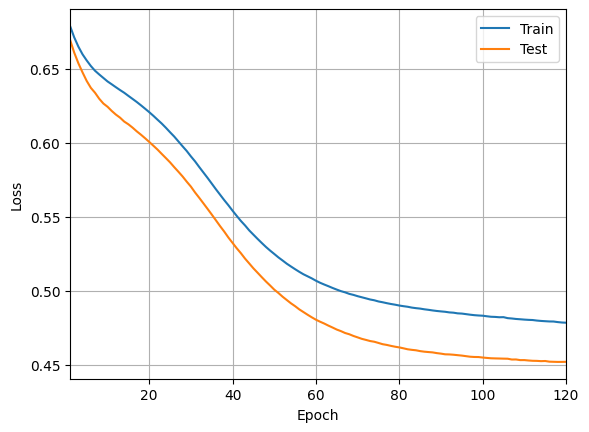

In [ ]:
# plot loss vs epochs
epochRange = range(1,epochs+1);
plt.plot(epochRange,history.history['loss'])
plt.plot(epochRange,history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.xlim((1,epochs))
plt.legend(['Train','Test'])
plt.show()

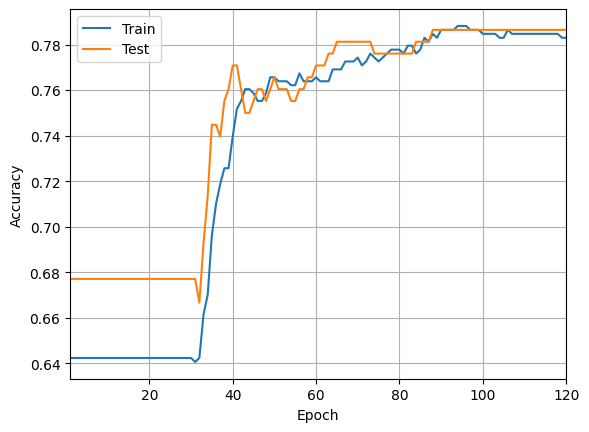

In [ ]:
# Plot accuracy vs epochs (DIY)
plt.plot(epochRange, history.history['accuracy'])
plt.plot(epochRange, history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.xlim((1,epochs))
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
# Test, Loss and accuracy
loss_and_metrics = basic_model.evaluate(X_test, y_test)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

6/6 [==============================] - 0s 3ms/step - loss: 0.4521 - accuracy: 0.7865
Loss =  0.452068954706192
Accuracy =  0.7864583134651184


## Classification Model Performance measures

<img src='https://editor.analyticsvidhya.com/uploads/99666confusion%20matrix.JPG' width=40%>

In [ ]:
y_pred = basic_model.predict(X_test)
print(y_test[:5])
print(y_pred[:5])

6/6 [==============================] - 0s 3ms/step
661    1
122    0
113    0
14     1
529    0
Name: 8, dtype: int64
[[0.77858526]
 [0.12162784]
 [0.09794389]
 [0.7211923 ]
 [0.13421191]]


In [ ]:
y_pred =[1 if y_pred[aa]>=0.5 else 0 for aa in range(len(y_pred)) ]
print(y_pred[:5])

[1, 0, 0, 1, 0]


In [ ]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       130
           1       0.68      0.63      0.66        62

    accuracy                           0.79       192
   macro avg       0.76      0.75      0.75       192
weighted avg       0.78      0.79      0.78       192

